<a href="https://colab.research.google.com/github/burcak-bayram/NLP-and-Text-Analysis-Module-Assignments-University-College-London/blob/main/23223014_INST0073_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting and Reporting the Polarity of Sentiments Associated with Characters of Kenilworth by Sir Walter Scott**
### 2 May 2024
### Module: Natural Language Processing and Text Analysis (INST0073)
### Module tutor: Andreas Vlachidis

This script analyses the sentiment associated with characters in the novel "Kenilworth" by Walter Scott using the TextBlob library for sentiment analysis and Matplotlib for data visualization. The goal is detecting the sentiment polarity (positive, negative, neutral) associated with two of the characters from the narrative.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Part I: Importing of Libraries and Text Setup
Importing of the necessary libraries for NLP, sentiment analysis and data visualisation and setting up the environment for processing the text.

In [ ]:
import spacy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from collections import defaultdict
import matplotlib.pyplot as plt


# Setting up the pre-trained NLP models
nlp_spacy = spacy.load('en_core_web_sm')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## Part II: Text Pre-processing and Acquisition

This is the part where we load the raw data for Named Entity Recognition and Sentiment Analysis from the text file of *Kenilworth*.

In [ ]:
# Since my NER analysis kept giving me special characters I downloaded the text in my drive rather than acquiring it from the projectgutenberg website'
file_path = '/content/drive/My Drive/Colab Notebooks/Assignment 2/kenilworth.txt'

import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks/Assignment 2'))


try:
    with open(file_path, 'r', encoding='utf-8') as file:
        kenilworth_txt = file.read()
    print("File loaded successfully.")
except FileNotFoundError:
    print("File not found. Check the file path and name.")
except Exception as e:
    print("An error occurred:", e)



['kenilworth.txt', '23223014-INST0073-0.ipynb', '23223014_INST0073_2 (1).ipynb']
File loaded successfully.


## Part III: Character Frequency Analysis

Using spaCy, this part performs Named Entity Recognition (NER) to identify characters in the narrative. This process determines which characters are mentioned most often, preparing the groundwork for the sentiment analysis.

In [ ]:

nlp_spacy = spacy.load('en_core_web_sm')

# Adjusting the max_length of the document so spaCy can handle it
nlp_spacy.max_length = 2000000  # Increase to 2,000,000 characters to handle large texts

# Processing the text using spaCy to detect entities
doc = nlp_spacy(kenilworth_txt)

# Extracting character names
characters = {ent.text for ent in doc.ents if ent.label_ == "PERSON"}

print(characters)





{'Edmund Tressilian', 'Tapster', 'Solomon', 'King Arthur', 'silken mantle', 'XIII.--LEGEND', 'Griffin', 'Lambourne--“it', 'Don Philip', 'thou keepest time', 'Fairy', 'Richard', 'Master Crane', 'bowing,--', 'Brampton Brian', 'Knight', 'Juno', 'Edmund', 'Bowyer', 'Chillingham Castle', 'Naaman', 'Badger', "Master Tressilian's", 'Gallantry', 'QUINCE', 'Gospel', 'Saul', 'Will\nHostler', 'Robsart', 'Michael Lambourne', 'Majesty', 'Jack Tapster', 'Denbigh', 'Heed', 'grey beard', 'Robert Sibbald', 'Which Tony Foster', 'Lady Leicester', 'Doublestitch', 'Ricardo', 'Princely Progress', 'Capricorn', 'Rice', 'Jonson', 'Cressid', 'Englishman', 'Glad', "Saint Lucy's Eve", 'Foster', 'Honest Blount', 'Green Cloth', 'Bilboa', 'Drummond', 'Paladin', 'kittle', 'Dame Alison Crane', 'Erasmus Holiday', 'Hunsdon', 'Said Blount', 'Bayes', 'Gaffer\nPinniewinks', 'knelt Leicester', 'LIMITED WARRANTY', 'Markham', 'Almains', 'Bald Butter', 'wolf', 'Laneham', 'Janet', 'Lady Varney', 'Martin Swart', 'Richard Crookba

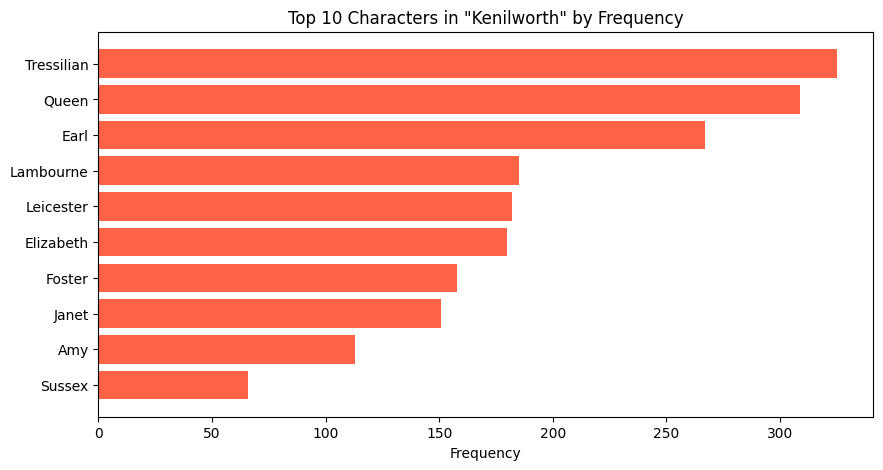

In [ ]:


# Function to count frequencies of character entities
def count_frequency_spacy(characters, doc):
    character_freq = defaultdict(int)
    for ent in doc.ents:
        if ent.text in characters and ent.label_ == "PERSON":
            character_freq[ent.text] += 1
    return character_freq

# Calculate frequencies using the 'characters' set and 'doc' processed by spaCy
character_freq = count_frequency_spacy(characters, doc)

# Plotting top 10 characters with a horizontal bar chart
def plot_character_frequencies(character_freq, title):
    # Sorting and selecting top 10
    sorted_characters = sorted(character_freq.items(), key=lambda x: x[1], reverse=True)
    top_10 = sorted_characters[:10]

    # Plotting
    top_names, top_counts = zip(*top_10)

    plt.figure(figsize=(10, 5))
    plt.barh(top_names, top_counts, color='tomato')
    plt.title(f'Top 10 Characters in "{title}" by Frequency')
    plt.xlabel('Frequency')
    plt.gca().invert_yaxis()
    plt.show()

plot_character_frequencies(character_freq, 'Kenilworth')





## Part IV: Sentiment Analysis
It is now clear that "Tressilian" and "Queen Elizabeth" are the two characters most frequently mentioned in *Kenilworth*. At this stage, we can use TextBlob to analyze the sentiment of sentences that feature these two characters in various contexts.

In [ ]:
# Variants of the characters
tressilian_variants = {'Edmund', 'Edmund\nTressilian', 'Edmund Tressilian', 'Master\nTressilian', 'Master Tressilian', "Master Tressilian's", "Notwithstanding Tressilian's", 'Tressilian', 'Tressilian,”--he', 'forward.--Master Tressilian'}
queen_variants = {'Queen', "Queen\nElizabeth's", "Lady Elizabeth", 'Queen Elizabeth', "Queen Elizabeth's", 'Elizabeth', 'Queen.--“My Lord'}

# Aggregating counts for variants
def aggregate_variants(character_freq, variants):
    total_count = sum(character_freq[variant] for variant in variants if variant in character_freq)
    return total_count

# New frequency dictionaries for spaCy
character_freq_new = {
    'Tressilian': aggregate_variants(character_freq, tressilian_variants),
    'Queen Elizabeth': aggregate_variants(character_freq, queen_variants)
}
character_freq_new

{'Tressilian': 365, 'Queen Elizabeth': 509}

In [ ]:
# Sentiment analysis for TextBlob
def sentiment_analysis(doc, characters):
    sentiment_scores = []
    sentences = [sent.text for sent in doc.sents]
    for sentence in sentences:
        if any(character in sentence for character in characters):
            sentiment = TextBlob(sentence).sentiment.polarity
            sentiment_scores.append(sentiment)
    return sentiment_scores

# Sentiment analysis performed
tressilian_sentiments = sentiment_analysis(doc, tressilian_variants)
queen_sentiments = sentiment_analysis(doc, queen_variants)

# Calculating the average sentiment scores
def calculate_average_sentiment(sentiments):
    return sum(sentiments) / len(sentiments) if sentiments else 0

# Average sentiment for TextBlob
average_tressilian = calculate_average_sentiment(tressilian_sentiments)
average_queen = calculate_average_sentiment(queen_sentiments)

print(f"Average Sentiment Scores (TextBlob) - Tressilian: {average_tressilian}, Queen Elizabeth: {average_queen}")

Average Sentiment Scores (TextBlob) - Tressilian: 0.08730262795346867, Queen Elizabeth: 0.12037867460056027


## Part V: Data Visualisation
Display the sentiment analysis outcomes to understand the portrayals of characters.

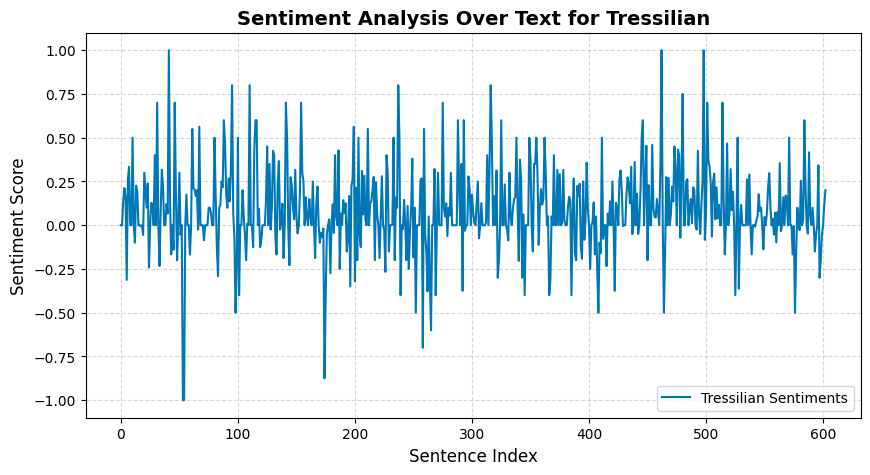

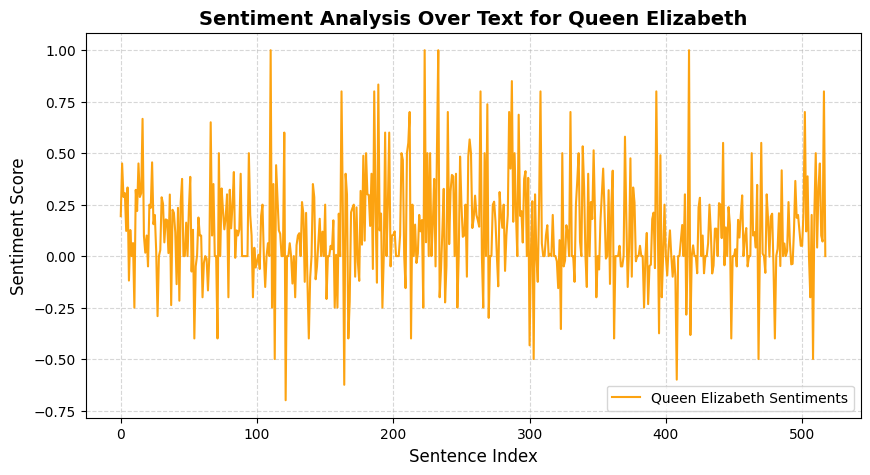

In [ ]:
import matplotlib.pyplot as plt
#plotting of sentiment scores
def plot_sentiments_line(sentiments, character_name, color):
    plt.figure(figsize=(10, 5))
    plt.plot(sentiments, label=f'{character_name} Sentiments', color=color, linestyle='-')
    plt.title(f'Sentiment Analysis Over Text for {character_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Sentence Index', fontsize=12)
    plt.ylabel('Sentiment Score', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

#plotting sentiments for both characters
plot_sentiments_line(tressilian_sentiments, 'Tressilian', color='#0077b6')
plot_sentiments_line(queen_sentiments, 'Queen Elizabeth', color='#fca311')


